In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

from mlscorecheck.auc import auc_from_sens_spec, acc_from_auc

In [88]:
data = pd.read_csv('single.csv')

In [89]:
data.head()

,Unnamed: 0,dataset,acc,sens,spec,auc,best_acc,best_sens,best_spec,threshold,best_threshold,p,n
0,0,abalone9_18,0.9728,0.2000,1.0000,0.647183,0.9728,0.2000,1.0000,0.363737,0.714286,5,142
1,1,appendicitis,0.8636,0.5000,0.9444,0.597222,0.8636,0.5000,0.9444,0.089821,1.000000,4,18
2,2,australian,0.5435,0.0156,1.0000,0.746199,0.7174,0.7812,0.6622,0.518418,0.351968,64,74
3,3,bupa,0.5942,0.2414,0.8500,0.511207,0.5942,0.2414,0.8500,0.080741,1.000000,29,40
4,4,CM1,0.8900,0.0000,0.9889,0.725556,0.8900,0.0000,0.9889,0.441309,0.570937,10,90


In [90]:
data['auc_min_max_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['acc'], 'sens': row['sens'], 'spec': row['spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='max'
        ), 
axis=1)

data['auc_cmin_max_int'] = data.apply(
    lambda row:
    auc_from_sens_spec(
        scores={'acc': row['acc'], 'sens': row['sens'], 'spec': row['spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='max'
        ),
axis=1)

data['auc_min_amax_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='amax'
        ), 
axis=1)

data['auc_cmin_amax_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='amax'
        ), 
axis=1)

In [91]:
data['acc_min_max_int'] = data.apply(
    lambda row: 
    acc_from_auc(
        scores={'auc': row['auc']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        upper='max'
        ), 
axis=1)

data['acc_min_cmax_int'] = data.apply(
    lambda row: 
    acc_from_auc(
        scores={'auc': row['auc']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        upper='cmax'
        ), 
axis=1)

In [92]:
for label in ['auc_min_max_int', 'auc_cmin_max_int', 'auc_min_amax_int', 'auc_cmin_amax_int', 'acc_min_max_int', 'acc_min_cmax_int']:
    data[label[:-4]] = data[label].apply(lambda x: None if x is None else (x[0] + x[1])/2.0)

In [93]:
data['auc_min_max_diff'] = data['auc'] - data['auc_min_max']
data['auc_cmin_max_diff'] = data['auc'] - data['auc_cmin_max']
data['auc_min_amax_diff'] = data['auc'] - data['auc_min_amax']
data['auc_cmin_amax_diff'] = data['auc'] - data['auc_cmin_amax']

data['acc_min_max_diff'] = data['acc'] - data['acc_min_max']
data['acc_min_cmax_diff'] = data['best_acc'] - data['acc_min_cmax']

In [94]:
figsize = (4, 2)
figsize2 = (2, 2)
n_bins = 20

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


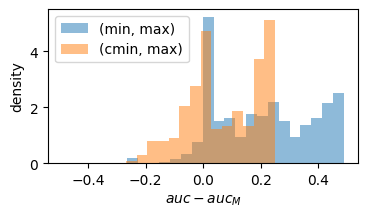

In [104]:
plt.figure(figsize=figsize)
plt.hist(data['auc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_cmin_max_diff'], label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$auc - auc_M$')
plt.ylabel('density')
plt.legend()
plt.savefig('auc-min-max-cmin-max-hist.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


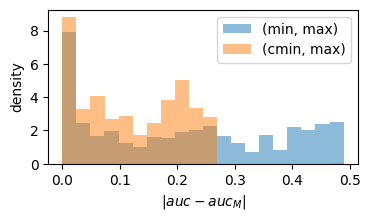

In [105]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['auc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_cmin_max_diff']), label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert auc - auc_M\vert$')
plt.ylabel('density')
plt.legend()
plt.savefig('auc-min-max-cmin-max-abs-hist.eps')
plt.show()

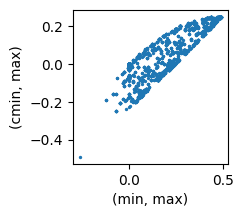

In [106]:
plt.figure(figsize=figsize2)
plt.scatter(data['auc_min_max_diff'], data['auc_cmin_max_diff'], s=2)
plt.xlabel(r'(min, max)')
plt.ylabel('(cmin, max)')
plt.savefig('auc-min-max-cmin-max-scatter.eps')
plt.show()

In [98]:
wilcoxon(
    np.abs(data.dropna()['auc_cmin_max_diff']), 
    np.abs(data.dropna()['auc_min_max_diff']), 
    alternative='less'
)

WilcoxonResult(statistic=np.float64(48909.5), pvalue=np.float64(9.858047701976891e-254))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


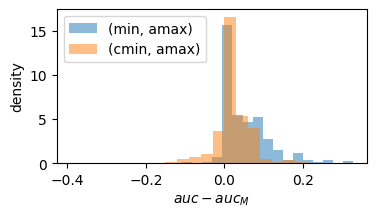

In [107]:
plt.figure(figsize=figsize)
plt.hist(data['auc_min_amax_diff'], label='(min, amax)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_cmin_amax_diff'], label='(cmin, amax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$auc - auc_M$')
plt.ylabel('density')
plt.legend()
plt.savefig('auc-min-amax-cmin-amax-hist.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


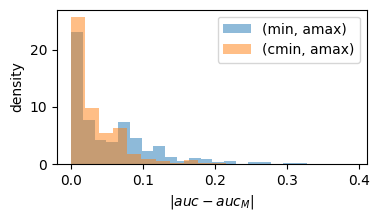

In [108]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['auc_min_amax_diff']), label='(min, amax)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_cmin_amax_diff']), label='(cmin, amax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert auc - auc_M\vert$')
plt.ylabel('density')
plt.legend()
plt.savefig('auc-min-amax-cmin-amax-abs-hist.eps')
plt.show()

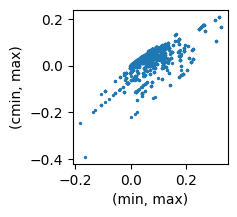

In [109]:
plt.figure(figsize=figsize2)
plt.scatter(data['auc_min_amax_diff'], data['auc_cmin_amax_diff'], s=2)
plt.xlabel(r'(min, max)')
plt.ylabel('(cmin, max)')
plt.savefig('auc-min-amax-cmin-amax-scatter.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


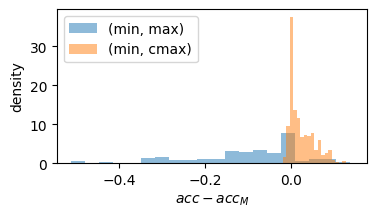

In [110]:
plt.figure(figsize=figsize)
plt.hist(data['acc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['acc_min_cmax_diff'], label='(min, cmax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$acc - acc_M$')
plt.ylabel('density')
plt.legend()
plt.savefig('acc-min-max-min-cmax-hist.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


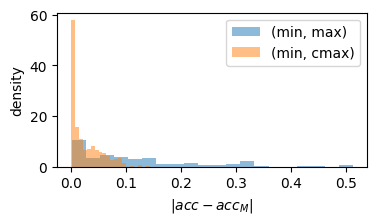

In [111]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['acc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['acc_min_cmax_diff']), label='(min, cmax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert acc - acc_M \vert$')
plt.ylabel('density')
plt.legend()
plt.savefig('acc-min-max-min-cmax-abs-hist.eps')
plt.show()

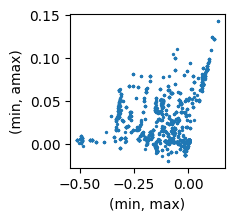

In [112]:
plt.figure(figsize=figsize2)
plt.scatter(data['acc_min_max_diff'], data['acc_min_cmax_diff'], s=2)
plt.xlabel(r'(min, max)')
plt.ylabel('(min, amax)')
plt.savefig('acc-min-max-min-cmax-scatter.eps')
plt.show()